# Strukture ABM omrežij

Okolje poleg informacij o času posreduje tudi informacije o njegovi strukturi in kako so v to strukturo umeščeni agenti.

<img src="img/nikolicskicaokolje.jpg" width="450" align="right"/>

Znotraj agentnega modela so agenti za voljo komunikacije medseboj povezani v omrežje, ki definira način komunikacije med agenti.
Nekaj osnovnih omrežij, ki so primerna za agentno modeliranje so: 

- Naključna povezava alo Soup
- Povezava glede na razdaljo
- Small world
- Scale free

Za izdelavo in izris topologij si bomo pomagali z knjižnico NetworkX in MatPlotLib

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

## 1. Naključna povezava ali Soup
Omrežje z naključnimi povezavami je zelo preprosto. Agent iz seznama vseh agentov izbere enega naključnega in se z njim poveže, neglede na lokacijo agenta (če jo ima). Torej vsak agenti ima enako verjetnost da bo komuniciral z nekim drugim agentom.

Lastnosti takšne strukture so: 
- Povprečna razdalja povezav med agenti, kar pomeni da z nekaj koraki lahko povežemo katerakoli 2 agenta
- Nizek nivo rojenja (clustering), kar pomeni, da se v strukturi ne ustvarjajo podskupine med katerimi bi bila komunikacija bolj pogosta, kot je to značilno za realna socialna omrežja


Z naslednjo kodo bomo ustvarili naključno omrežje z 8 agenti, vsak od njih bo naključno izbral 4 povezave. 

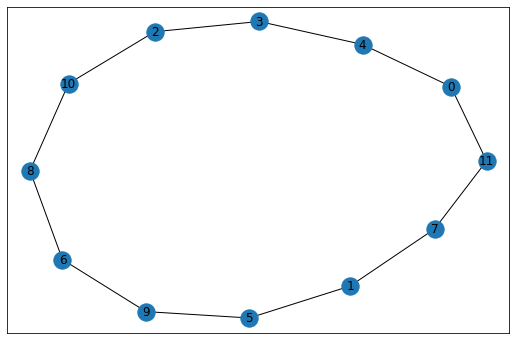

In [2]:
G = nx.random_regular_graph(2, 12)
plt.figure(figsize = (9, 6))
nx.draw_networkx(G)

V naslednjem koraku bomo ročno izdelali omrežje v katerem bomo 

## 2. Prostorsko omrežje 

<img src="img/prostorsko.jpg" width="350" align="right"/>
V prostorskem omrežju se agenti povežejo s seznamom svojih sosedov. To so lahko sosedi v celičnem prostoru ali sosedi, ki so od agenta oddaljeni za nek doseg. V takšnih sistemih imajo ponavadi agenti kot njihobo lastnost določene X,Y koordinate. 
V takšni strukturi velja da imata dva sosednja agenta zelo verjetno tudi ostale povezave iste ali podobne.

Lastnosti takšne strukture so:
- Ima visok nivo rojenja
- Lokalna omrežja konvergirajo hitro, globalno pa zelo počasi

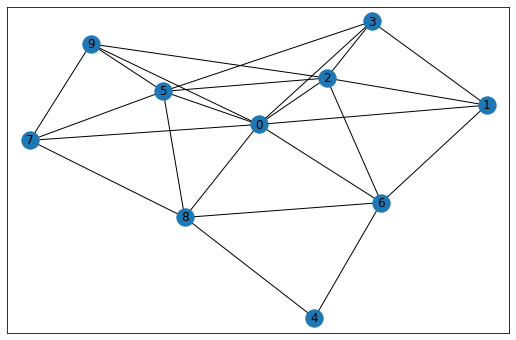

In [3]:
R = nx.random_geometric_graph(10, 0.5)
plt.figure(figsize = (9, 6)) 
nx.draw_networkx(R)

Z naslednjo vrstico lahko izpišemo koordinate vseh agentov v zgornjem omrežju. Knjižnica Networkx za izpis koordinat uporablja slovar, kjer je ID agenta ključ, kateremu pripada seznam X in Y koordinat.

In [4]:
list(R.nodes(data='pos'))

[(0, [0.3371156226234193, 0.595183694122395]),
 (1, [0.23426084864231678, 0.17489099255296547]),
 (2, [0.24582072405808741, 0.49433557212167045]),
 (3, [0.07142117699437456, 0.4872559839500371]),
 (4, [0.7527673413083334, 0.09688830810792382]),
 (5, [0.50276370192538, 0.6780826384432714]),
 (6, [0.4931927135194455, 0.16485664123403]),
 (7, [0.7439916126645982, 0.6690669796885378]),
 (8, [0.8208236822876683, 0.5179990408360913]),
 (9, [0.47398926093440596, 0.9077404007185325])]

V naslednjem koraku bomo te koordinate shranili v slovar in jih uporabili da repliciramo zgornji graf z manjšim koeficientom povezave, tako da bomo lahko opazovali kako razdalja med agenti vpliva na njihovo povezljivost

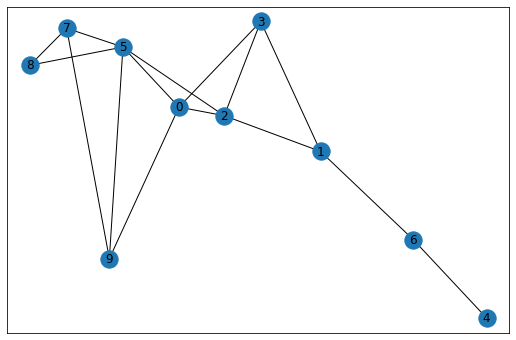

In [5]:
pozicije = dict(R.nodes(data='pos')) #ustvarimo seznam
R2 = nx.random_geometric_graph(10, 0.4, pos=pozicije)
plt.figure(figsize = (9, 6)) 
nx.draw_networkx(R2)

In [6]:
list(R2.nodes(data='pos'))

[(0, [0.3371156226234193, 0.595183694122395]),
 (1, [0.23426084864231678, 0.17489099255296547]),
 (2, [0.24582072405808741, 0.49433557212167045]),
 (3, [0.07142117699437456, 0.4872559839500371]),
 (4, [0.7527673413083334, 0.09688830810792382]),
 (5, [0.50276370192538, 0.6780826384432714]),
 (6, [0.4931927135194455, 0.16485664123403]),
 (7, [0.7439916126645982, 0.6690669796885378]),
 (8, [0.8208236822876683, 0.5179990408360913]),
 (9, [0.47398926093440596, 0.9077404007185325])]

## 3. Small world omrežje

Small world omrežje dobimo z nadgradnjo prejšnega prostorskega omrežja. To izvedemo tako, da manjše število kratkih sosednjih povezav zamenjamo s povezavami do oddaljenih agentov. S primernim številom povezav lahko dosežemo kratko povprečno razdaljo med agenti. Tovrstna struktura je veliko bolj realistična kot Soup ali Prostorsko omrežje, hkrati pa tudi veliko bolj kompleksna za statistično analizo.
<img src="img/smallworld.jpg" width="350" align="right"/>

Lastnosti takšne strukture so: 
- Kratka povprečna razdalja med agenti
- Ohrani visok nivo rojenja
- Pospeši globalno konvergenco modela

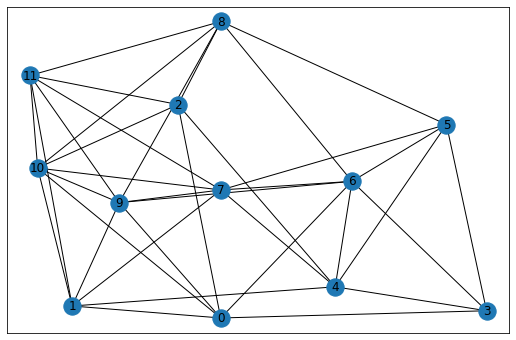

In [7]:
S = nx.watts_strogatz_graph(n = 12, k = 6, p = 0.2) 
plt.figure(figsize = (9, 6)) 
nx.draw_networkx(S) 

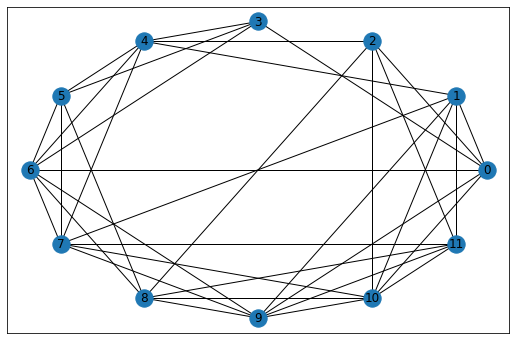

In [8]:
pos = nx.circular_layout(S)  
plt.figure(figsize = (9, 6)) 
nx.draw_networkx(S, pos) 

## 4. Scale free omrežje 
Struktura scale free omrežja je podobna kot pri Small world. Razlika je v tem da ima majhno število agentov veliko popularnost ostala večina pa nizko.
<img src="img/scalefree.jpg" width="350" align="right"/>
To pomeni, da imajo popularni agenti zelo veliko število povezav in opravljajo nalogo vozlišč in tako učinkovito posnemajo realna socialna omrežja. Ne Lastnosti tovrstne strukture so:

- Kratka povprečna razdalja med agenti
- Visok nivo rojenja


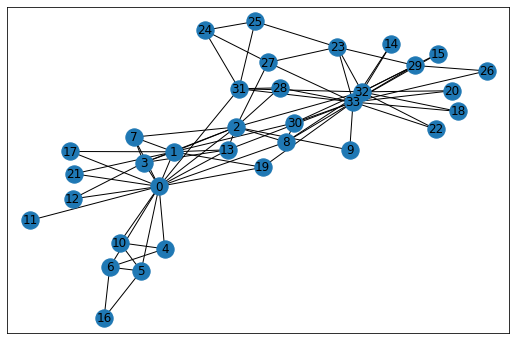

In [9]:
SF = nx.karate_club_graph()
plt.figure(figsize= (9,6))
nx.draw_networkx(SF)

## Gradnja omrežja

V naslednjih korakih bomo ročno izdelali omrežje, ki ga bomo postopoma razvijali v small world omrežje.

Začnemo z osnovami, najprej si ogledamo, kako na graf izrišemo 2 agenta in ju povežemo. 

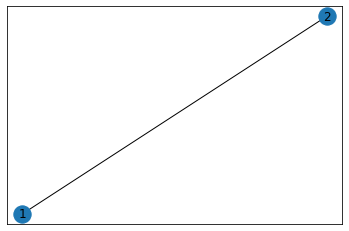

In [10]:
O=nx.Graph()
O.add_node(1,pos=(1,1))
O.add_node(2,pos=(2,2))
O.add_edge(1,2)
pos=nx.get_node_attributes(O,'pos')
nx.draw_networkx(O,pos)

### Naključne pozicije agentov
Koordinate lahko izberemo tudi naključno, kar bomo pokazali v spodnjem primeru. Agentoma bomo X in Y koordinati določili s pomočjo funkcije randint, ki nam vrne celo število med 0 in 5

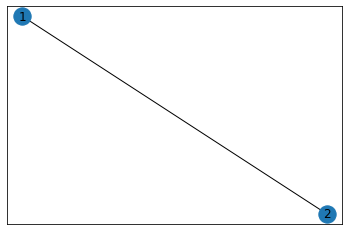

In [11]:
import random
O1=nx.Graph()
O1.add_node(1,pos=(random.randint(0,5),random.randint(0,5)))
O1.add_node(2,pos=(random.randint(0,5),random.randint(0,5)))
O1.add_edge(1,2)
pos=nx.get_node_attributes(O1,'pos')
nx.draw_networkx(O1,pos)

### Slovar koordinat
Pozicije agentov lahko določimo tudi s pomočjo vhodnih podatkov. V naslednjem primeru bomo zapisali slovar v katerem se bodo nahajale koordinate za posameznega agenta. 

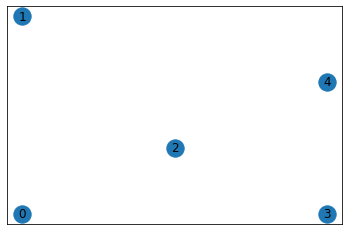

In [12]:
koordinate = {0: (1, 1), 1: (1, 4), 2: (2, 2), 3: (3, 1), 4: (3, 3)} 
O2=nx.Graph()
O2.add_nodes_from(koordinate.keys())
nx.draw_networkx(O2,koordinate)

### Naključne povezave
Zaenkrat smo na graf izrisali samo agente, ki se nahajajo na podanih koordinatah. V naslednjem koraku bomo med naključne agente postavili povezave (Komunikacije). Tovrstna komunikacija je značilna za Soup omrežje (Omrežje z naključnimi povezavami)  

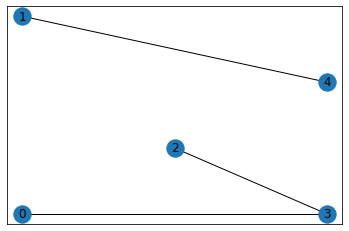

In [13]:
for i in range(3):
    O2.add_edge(random.randint(0,4),random.randint(0,4))
nx.draw_networkx(O2, koordinate)

## Primerjava topologij 
Primerjave po: 
1. Koeficient rojenja omrežja
2. Povprečna dolžina povezave med agenti
3. Betwenness Centriality (Popularnost)

### Omrežje z naključnimi povezavami

In [ ]:
n, m = 12, 3
while True:
    Random = nx.gnm_random_graph(n, m)
    if nx.is_connected(Random):
         break
nx.draw_networkx(Random)
print("Povpr. rojenje", nx.average_clustering(Random))
print("Povpr. najkrasa pot", nx.average_shortest_path_length(Random))
print("Najmocnejsi clen", max(nx.betweenness_centrality(Random).values()))

### Prostorsko omrežje

In [ ]:
Space = nx.random_geometric_graph(33, 0.29)
plt.figure(figsize = (9, 6)) 
nx.draw_networkx(Space)
print("Povpr. rojene", nx.average_clustering(Space))
print("Povpr. najkrasa pot", nx.average_shortest_path_length(Space))
print("Najmocnejsi clen", max(nx.betweenness_centrality(Space).values()))

### Small world omrežje

In [ ]:
Small_world = nx.watts_strogatz_graph(n = 12, k = 6, p = 0.2) 
plt.figure(figsize = (9, 6)) 
nx.draw_networkx(Small_world)
print("Povpr. rojenje", nx.average_clustering(Small_world))
print("Povpr. najkrasa pot", nx.average_shortest_path_length(Small_world))
print("Najmocnejsi clen", max(nx.betweenness_centrality(Small_world).values()))

### Scale-free omrežje

In [ ]:
SF = nx.karate_club_graph()
plt.figure(figsize= (9,6))
nx.draw_networkx(SF)
print("Povpr. rojenje", nx.average_clustering(SF))
print("Povpr. najkrasa pot", nx.average_shortest_path_length(SF))
print("Najmocnejsi clen", max(nx.betweenness_centrality(SF).values()))